In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import patchworklib as pw
from ase.visualize import view
import MDAnalysis as mda
from MDAnalysis.coordinates.XYZ import XYZWriter as XYZWriter
from ase import Atoms
import numpy as np

import sys
sys.path.append("/home/boittier/Documents/phd/water-knn")
from analysis.md import *

<Figure size 100x100 with 0 Axes>

In [2]:
data_path = Path("/home/boittier/pcbach/waterlj")
files = [str(_) for _ in list(data_path.glob("ccsdt_small/*256.log"))]

In [3]:
files

['/home/boittier/pcbach/waterlj/ccsdt_small/kmdcm-dynamics-256.log']

In [39]:
lines = open(files[-1]).readlines()

In [40]:
lines = [_ for _ in lines if _.startswith("DYNA> ") and "PROP>" not in _ and "update" not in _]

In [41]:
# lines

In [49]:
def fmt(x):
    try:
        return float(x[53:70])
    except:
        return None

In [52]:
np.array([fmt(_) for _ in lines if fmt(_) is not None ]).mean()

-61147.811846645585

In [5]:
data = get_job_data(files[:1])

/home/boittier/pcbach/waterlj/ccsdt_small/kmdcm-dynamics-256.log
water.256.heat2.dcd
water.256.equi2.dcd
water.256.dyna2.2.dcd


In [7]:
data["/home/boittier/pcbach/waterlj/ccsdt_small/kmdcm-dynamics-256.log"]

,vdw,elec,user,dyna,dcd,time,temp,tot,energy,volume,pressi,presse,path,title,prod,dens
0,431.08392,-2530.55014,0.0,0: DYNA STRT VERL,water.256.heat2.dcd,None,None,None,None,9261.0,0.0,0.0,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,False,7.053604261071561 gram / centimeter ** 3
1,408.30232,-2426.15171,0.0,0: DYNA STRT VERL,water.256.heat2.dcd,None,None,None,None,9261.0,0.0,0.0,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,False,7.053604261071561 gram / centimeter ** 3
2,408.30232,-2426.15171,0.0,0: DYNA STRT VERL,water.256.heat2.dcd,None,None,None,None,9261.0,0.0,0.0,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,False,7.053604261071561 gram / centimeter ** 3
3,426.27852,-2451.86424,0.0,0: DYNA STRT VERL,water.256.heat2.dcd,None,None,None,None,9261.0,0.0,0.0,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,False,7.053604261071561 gram / centimeter ** 3
4,426.27852,-2451.86424,0.0,0: DYNA STRT VERL,water.256.heat2.dcd,None,None,None,None,9261.0,0.0,0.0,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,False,7.053604261071561 gram / centimeter ** 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006512,336.08126,-2052.74371,0.0,2: DYNA RESTRT CPT,water.256.dyna2.2.dcd,None,None,None,None,NaN,NaN,NaN,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,True,7.053604261071561 gram / centimeter ** 3
1006513,332.11635,-2041.67921,0.0,2: DYNA RESTRT CPT,water.256.dyna2.2.dcd,None,None,None,None,NaN,NaN,NaN,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,True,7.053604261071561 gram / centimeter ** 3
1006514,331.39492,-2047.00102,0.0,2: DYNA RESTRT CPT,water.256.dyna2.2.dcd,None,None,None,None,NaN,NaN,NaN,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,True,7.053604261071561 gram / centimeter ** 3
1006515,331.52130,-2056.30263,0.0,2: DYNA RESTRT CPT,water.256.dyna2.2.dcd,None,None,None,None,NaN,NaN,NaN,/home/boittier/pcbach/waterlj/ccsdt_small/kmdc...,_home_boittier_pcbach_waterlj_ccsdt_small_kmdc...,True,7.053604261071561 gram / centimeter ** 3


In [ ]:
# for k in data.keys():
#     print(k)
#     data[k].plot("time", "volume")
#     data[k].plot("time", "temp")
#     data[k].plot("time", "tot")

In [ ]:
for k in data.keys():
    print(k, data[k].tot[10000:].mean())

<AxesSubplot:xlabel='time'>

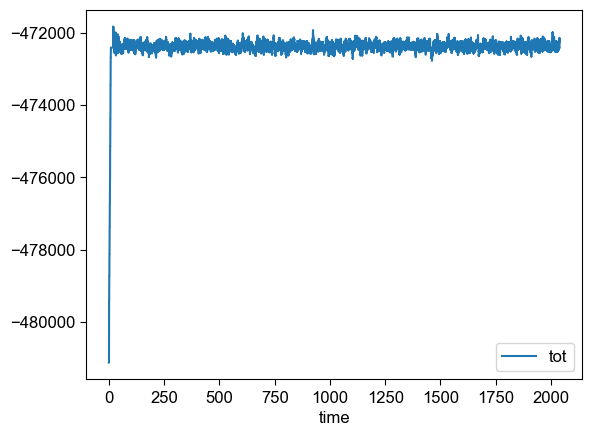

In [73]:
data[k].plot("time", "tot")
# plt.xlim(750.8, 751.2)
# plt.ylim(-472320, -472310)

In [74]:
for k in data.keys():
    # data[k].plot("time", "volume")
    _ = print_vol_error(data[k])
    print(_)
    _ = get_dG_(data[k])
    print(_)

0.8720554508702968 gram / centimeter ** 3
8.199769594058411 kilocalorie / mole
0.884650918358523 gram / centimeter ** 3
8.224825800083496 kilocalorie / mole
0.8753371671644069 gram / centimeter ** 3
8.212683728288086 kilocalorie / mole
0.8960816818137491 gram / centimeter ** 3
8.245559777077803 kilocalorie / mole
0.874914397991377 gram / centimeter ** 3
8.207113818874776 kilocalorie / mole


In [75]:
data[k][data[k]["dyna"] == "2: DYNA RESTRT CPT"]

,vdw,elec,user,dyna,dcd,time,temp,tot,energy,volume,pressi,presse,path,title,prod,dens
1450,3133.68978,-19010.83152,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,40.000,296.54319,-472380.69846,77683.40623,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3
1451,3130.67660,-18994.08331,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,40.002,296.46918,-472380.62743,77682.01161,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3
1452,3130.51292,-18989.31351,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,40.004,300.90426,-472380.83423,77761.52544,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3
1453,3135.45452,-19002.34586,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,40.006,299.08672,-472380.59589,77728.78624,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3
1454,3139.17227,-18999.69008,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,40.008,299.76272,-472380.81288,77741.09129,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006445,3136.68930,-18967.71218,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,2039.992,298.61920,-472244.82149,77584.65183,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3
1006446,3130.14728,-18967.40284,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,2039.994,301.55089,-472245.07266,77637.32682,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3
1006447,3127.13492,-18960.76699,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,2039.996,300.41461,-472244.91477,77616.85024,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3
1006448,3125.15001,-18949.16299,0.0,2: DYNA RESTRT CPT,water.2000.dyna2.2.dcd,2039.998,302.65619,-472245.04674,77657.06553,68326.0,0,0,/home/boittier/pcbach/waterlj/ccsdt-1-r3/kmdcm...,_home_boittier_pcbach_waterlj_ccsdt-1-r3_kmdcm...,True,0.874914397991377 gram / centimeter ** 3


In [55]:
# def get_dG_(total_energy, nwater=2000, usingle = -228.20148):
#     tot = total_energy.mean()
#     Ubox = tot/ nwater
#     # Ubox = -481858.7536643403 / 2000
#     Ubox = Ubox * ureg("kcal/mol")
#     Usingle = usingle * ureg("kcal/mol")
from pint import UnitRegistry
import warnings
# ignore the casting errors for units
warnings.simplefilter("ignore")
ureg = UnitRegistry()

Gas_const = 8.3144621 * ureg("J/(mol*K)")  # % JK^−1mol^−1
Gas_const = Gas_const.to("kcal/(mol*K)")
#     T = 298.0 * ureg("K")
#     dHvap = Usingle - Ubox + T*Gas_const
#     return dHvap.magnitude

In [65]:
-228.99139007818755* ureg("kcal/mol") - (-61153.52708)/ 256 * ureg("kcal/mol")  + 300 * ureg("K") * Gas_const

10.48573631850222 <Unit('kilocalorie / mole')>